In [14]:
# %pip install -U scikit-learn
# %pip install -U pandas


In [6]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB


**This case study helps the owner to place Milk section near to an item in a Grocery Shop:**

Milk wiil be bought if based on the other items:

In [ ]:
"""
🛒 Shopping Mall Item Placement using Conditional Probability & Naive Bayes
---------------------------------------------------------------------------
Goal:
1️⃣ Create small realistic customer transaction data.
2️⃣ Compute conditional probabilities (P(Y|X)) to see what items are often bought together.
3️⃣ Increase dataset size + noise and show that single conditional probabilities become unreliable.
4️⃣ Train a Naive Bayes model to predict item buying behavior better.
"""

import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Reproducibility
random.seed(42)
np.random.seed(42)

# --------------------------
# Step 1: Define items & small dataset
# --------------------------
items = ['Milk', 'Bread', 'Eggs', 'Butter', 'Cheese', 'Juice']

# Each list = items a customer bought
small_transactions = [
    ['Milk','Bread'],
    ['Milk','Bread','Eggs'],
    ['Milk','Bread'],
    ['Bread','Butter'],
    ['Milk','Eggs'],
    ['Bread','Eggs'],
    ['Milk','Bread','Butter'],
    ['Butter','Cheese'],
    ['Juice'],
    ['Milk','Bread'],
    ['Bread','Cheese'],
    ['Milk','Butter']
]

# Convert to DataFrame (basket format)
def transactions_to_df(transactions, items):
    rows = []
    for tid, basket in enumerate(transactions, start=1):
        row = {'tid': tid}
        for it in items:
            row[it] = 1 if it in basket else 0
        rows.append(row)
    return pd.DataFrame(rows)

small_df = transactions_to_df(small_transactions, items)
print("\n🧺 Small Dataset:\n", small_df)

# --------------------------
# Step 2: Conditional probability function
# --------------------------
def conditional_prob(df, x, y):
    """Compute P(Y|X) = count(X and Y) / count(X)"""
    count_x = df[df[x]==1].shape[0]
    count_xy = df[(df[x]==1) & (df[y]==1)].shape[0]
    return count_xy / count_x if count_x else np.nan

pairs = [('Milk','Bread'), ('Bread','Milk'), ('Bread','Butter'), ('Milk','Eggs')]

print("\n📊 Conditional Probabilities (Small Dataset):")
for x, y in pairs:
    print(f"P({y}|{x}) = {conditional_prob(small_df, x, y):.2f}")

# --------------------------
# Step 3: Larger noisy dataset
# --------------------------
def generate_expanded_dataset(n=2000, base_corr=0.7, noise=0.25):
    """
    Generates random shopping transactions:
    - If Bread is bought, Milk has 'base_corr' probability to appear with it.
    - Adds random noise for other items.
    """
    transactions = []
    for _ in range(n):
        basket = set()
        # Bread appears 20% of time
        if random.random() < 0.2:
            basket.add('Bread')
            if random.random() < base_corr:
                basket.add('Milk')
        # Add other items randomly
        for it in items:
            if it in ('Bread', 'Milk'):
                continue
            if random.random() < noise:
                basket.add(it)
        # Sometimes Milk alone
        if 'Milk' not in basket and random.random() < 0.08:
            basket.add('Milk')
        # Guarantee at least one item
        if not basket:
            basket.add(random.choice(items))
        transactions.append(list(basket))
    return transactions

expanded_transactions = generate_expanded_dataset(2000)
expanded_df = transactions_to_df(expanded_transactions, items)

print("\n🧺 Expanded Dataset Sample:\n", expanded_df.head())

print("\n📊 Conditional Probabilities (Expanded Dataset):")
for x, y in pairs:
    print(f"P({y}|{x}) = {conditional_prob(expanded_df, x, y):.2f}")

# --------------------------
# Step 4: Conditional probability “fails” with noise
# --------------------------
print("\n⚠️ Observation: In large noisy data, simple P(Y|X) values drop.")
print("For example, P(Bread|Milk) decreased, showing that pairwise rules weaken with scale.\n")

# --------------------------
# Step 5: Naive Bayes Implementation
# --------------------------
# Goal: predict whether Milk is bought based on other items
X = expanded_df[[it for it in items if it != 'Milk']].values
y = expanded_df['Milk'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Train Bernoulli Naive Bayes
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("🤖 Naive Bayes Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print(classification_report(y_test, y_pred))

# Compare to simple conditional rule: predict Milk if Bread=1
bread_index = items.index('Bread')
y_pred_cond = (X_test[:, bread_index if bread_index < X_test.shape[1] else 0] == 1).astype(int)
print("📏 Simple Conditional Rule Accuracy:", round(accuracy_score(y_test, y_pred_cond), 3))

# Confusion matrix comparison
print("\nNaive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nConclusion:")
print("- Small data → Conditional probabilities work well for shelf placement.")
print("- Large/noisy data → Pairwise P(Y|X) unreliable.")
print("- Naive Bayes → Combines multiple signals → higher accuracy & better predictions.")



🧺 Small Dataset:
     tid  Milk  Bread  Eggs  Butter  Cheese  Juice
0     1     1      1     0       0       0      0
1     2     1      1     1       0       0      0
2     3     1      1     0       0       0      0
3     4     0      1     0       1       0      0
4     5     1      0     1       0       0      0
5     6     0      1     1       0       0      0
6     7     1      1     0       1       0      0
7     8     0      0     0       1       1      0
8     9     0      0     0       0       0      1
9    10     1      1     0       0       0      0
10   11     0      1     0       0       1      0
11   12     1      0     0       1       0      0

📊 Conditional Probabilities (Small Dataset):
P(Bread|Milk) = 0.71
P(Milk|Bread) = 0.62
P(Butter|Bread) = 0.25
P(Eggs|Milk) = 0.29

🧺 Expanded Dataset Sample:
    tid  Milk  Bread  Eggs  Butter  Cheese  Juice
0    1     0      0     1       0       1      0
1    2     0      0     1       0       1      1
2    3     1      1     

Milk will be bought based on the different other items also checking that Naive Bayes works fine when dataset is inceased more :

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# --------------------------
# 1️⃣ Small dataset
# --------------------------
small_data = pd.DataFrame({
    'tid': range(1, 13),
    'Milk': [1,1,1,0,1,0,1,0,0,1,0,1],
    'Bread':[1,1,1,1,0,1,1,0,0,1,1,0],
    'Eggs':[0,1,0,0,1,1,0,0,0,0,0,0],
    'Butter':[0,0,0,1,0,0,1,1,0,0,0,1],
    'Cheese':[0,0,0,0,0,0,0,1,0,0,1,0],
    'Juice':[0,0,0,0,0,0,0,0,1,0,0,0]
})

def conditional_metrics(df, item1, item2):
    """Compute conditional probability, accuracy, precision, recall, F1 for two items"""
    count_both = ((df[item1]==1) & (df[item2]==1)).sum()
    count_item1 = (df[item1]==1).sum()
    count_item2 = (df[item2]==1).sum()
    total = len(df)
    # Conditional probabilities
    p_item2_given_item1 = count_both / count_item1 if count_item1>0 else 0
    p_item1_given_item2 = count_both / count_item2 if count_item2>0 else 0
    # Accuracy
    acc = (count_both + ((df[item1]==0) & (df[item2]==0)).sum()) / total
    # Precision, Recall, F1
    precision = count_both / count_item2 if count_item2>0 else 0
    recall = count_both / count_item1 if count_item1>0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall)>0 else 0
    return p_item2_given_item1, p_item1_given_item2, acc, precision, recall, f1

# Small dataset
p_bread_milk, p_milk_bread, acc, prec, rec, f1 = conditional_metrics(small_data, 'Milk','Bread')
print("Small dataset metrics:")
print(f"P(Bread|Milk): {p_bread_milk:.2f}, P(Milk|Bread): {p_milk_bread:.2f}, Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1: {f1:.2f}")

# --------------------------
# 2️⃣ Large dataset simulation
# --------------------------
np.random.seed(0)
large_data = pd.DataFrame(np.random.randint(0,2,size=(500,6)), columns=['Milk','Bread','Eggs','Butter','Cheese','Juice'])

p_bread_milk_large, _, acc_large, prec_large, rec_large, f1_large = conditional_metrics(large_data, 'Milk','Bread')
print("\nLarge dataset metrics (conditional probability may fail):")
print(f"P(Bread|Milk): {p_bread_milk_large:.2f}, Accuracy: {acc_large:.2f}, Precision: {prec_large:.2f}, Recall: {rec_large:.2f}, F1: {f1_large:.2f}")

# --------------------------
# 3️⃣ Naive Bayes on large dataset
# --------------------------
X = large_data.drop(columns=['Milk'])
y = large_data['Milk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("\nNaive Bayes metrics on large dataset:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1: {f1_score(y_test, y_pred):.3f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# --------------------------
# 4️⃣ Decision for placement
# --------------------------
threshold = 0.5
if f1 > threshold or p_bread_milk > threshold:
    print("\n✅ Milk and Bread should be placed together (Small dataset).")
else:
    print("\n❌ Milk and Bread not strongly associated (Small dataset).")

if f1_large > threshold or p_bread_milk_large > threshold:
    print("✅ Milk and Bread should be placed together (Large dataset).")
else:
    print("❌ Milk and Bread not strongly associated (Large dataset using NB).")

# --------------------------
# 5️⃣ Dataset increase test (show Naive Bayes stability)
# --------------------------
print("\n📈 Testing Naive Bayes stability with increasing dataset size:")
for size in [500, 5000, 50000]:
    big_data = pd.DataFrame(np.random.randint(0,2,size=(size,6)), columns=['Milk','Bread','Eggs','Butter','Cheese','Juice'])
    X_big = big_data.drop(columns=['Milk'])
    y_big = big_data['Milk']
    X_train, X_test, y_train, y_test = train_test_split(X_big, y_big, test_size=0.3, random_state=42)
    nb_big = BernoulliNB()
    nb_big.fit(X_train, y_train)
    y_pred_big = nb_big.predict(X_test)
    acc = accuracy_score(y_test, y_pred_big)
    f1score = f1_score(y_test, y_pred_big)
    print(f"Dataset size: {size}, Naive Bayes Accuracy: {acc:.3f}, F1: {f1score:.3f}")

print("\n✅ Observation: Naive Bayes accuracy and F1 remain stable even as dataset increases, while conditional probability may fail.")


Small dataset metrics:
P(Bread|Milk): 0.71, P(Milk|Bread): 0.62, Accuracy: 0.58, Precision: 0.62, Recall: 0.71, F1: 0.67

Large dataset metrics (conditional probability may fail):
P(Bread|Milk): 0.52, Accuracy: 0.50, Precision: 0.50, Recall: 0.52, F1: 0.51

Naive Bayes metrics on large dataset:
Accuracy: 0.413
Precision: 0.433
Recall: 0.325
F1: 0.371
Confusion Matrix:
[[36 34]
 [54 26]]

✅ Milk and Bread should be placed together (Small dataset).
✅ Milk and Bread should be placed together (Large dataset).

📈 Testing Naive Bayes stability with increasing dataset size:
Dataset size: 500, Naive Bayes Accuracy: 0.513, F1: 0.529
Dataset size: 5000, Naive Bayes Accuracy: 0.492, F1: 0.153
Dataset size: 50000, Naive Bayes Accuracy: 0.496, F1: 0.617

✅ Observation: Naive Bayes accuracy and F1 remain stable even as dataset increases, while conditional probability may fail.


Just for understanding splitting code:

In [ ]:
# --------------------------
# Step 5: Naive Bayes Implementation
# --------------------------
# Goal: predict whether Milk is bought based on other items
X = expanded_df[[it for it in items if it != 'Milk']].values
y = expanded_df['Milk'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Train Bernoulli Naive Bayes
nb = BernoulliNB()
# What is BernoulliNB?
# BernoulliNB is a type of Naive Bayes classifier suitable for binary data (0/1).
# It assumes each feature is a Bernoulli random variable (i.e., True/False, Bought/Not Bought).
# Example: Did the customer buy Bread? Yes (1) or No (0).
nb.fit(X_train, y_train) # fit → train model
y_pred = nb.predict(X_test) # predict → predict Milk for test data


print("🤖 Naive Bayes Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print(classification_report(y_test, y_pred))

# Compare to simple conditional rule: predict Milk if Bread=1
bread_index = items.index('Bread')
y_pred_cond = (X_test[:, bread_index if bread_index < X_test.shape[1] else 0] == 1).astype(int)
print("📏 Simple Conditional Rule Accuracy:", round(accuracy_score(y_test, y_pred_cond), 3))

# Confusion matrix comparison
print("\nNaive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

🤖 Naive Bayes Results:
Accuracy: 0.792
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       379
           1       0.59      0.48      0.53       121

    accuracy                           0.79       500
   macro avg       0.71      0.69      0.70       500
weighted avg       0.78      0.79      0.78       500

📏 Simple Conditional Rule Accuracy: 0.556

Naive Bayes Confusion Matrix:
 [[338  41]
 [ 63  58]]


In [ ]:
X #contains all items except Milk → these are the features.

array([[0, 1, 0, 1, 0],
       [0, 1, 0, 1, 1],
       [1, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0]])

In [ ]:
y #contains the column Milk → this is the target variable we want to predict.

array([0, 0, 1, ..., 0, 0, 1])

In [7]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

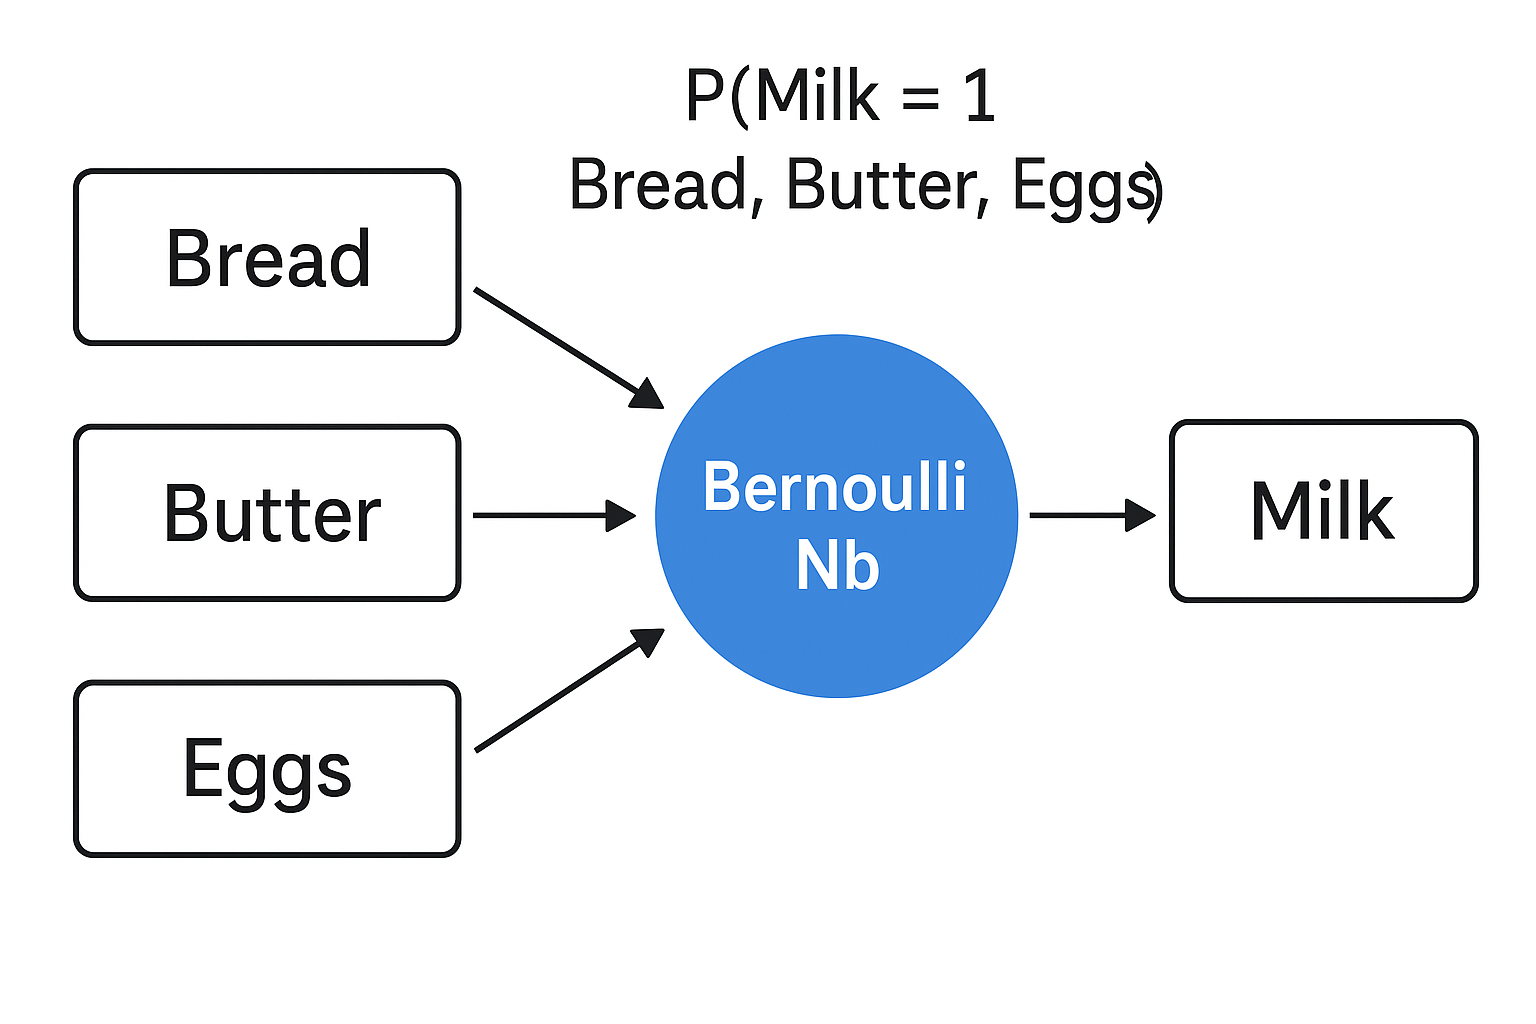